In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l


In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5

In [3]:
features = torch.randn((n_train + n_test), 1)
print(features.shape)

torch.Size([200, 1])


In [4]:
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
print(poly_features)

tensor([[ 1.1485e+00,  1.3190e+00,  1.5148e+00],
        [ 1.3165e+00,  1.7332e+00,  2.2818e+00],
        [ 4.0505e-01,  1.6407e-01,  6.6455e-02],
        [ 2.2445e+00,  5.0376e+00,  1.1307e+01],
        [ 1.2784e-01,  1.6343e-02,  2.0893e-03],
        [-3.6843e-01,  1.3574e-01, -5.0011e-02],
        [-5.6135e-01,  3.1511e-01, -1.7689e-01],
        [ 1.4012e+00,  1.9635e+00,  2.7513e+00],
        [ 4.5408e-02,  2.0619e-03,  9.3629e-05],
        [-9.5220e-01,  9.0669e-01, -8.6336e-01],
        [-4.9143e-03,  2.4150e-05, -1.1868e-07],
        [-1.1649e-01,  1.3571e-02, -1.5809e-03],
        [ 6.2695e-01,  3.9307e-01,  2.4644e-01],
        [ 4.6436e-01,  2.1563e-01,  1.0013e-01],
        [ 4.3808e-01,  1.9191e-01,  8.4072e-02],
        [ 3.5866e-01,  1.2864e-01,  4.6136e-02],
        [-1.0580e+00,  1.1193e+00, -1.1842e+00],
        [-5.8180e-01,  3.3849e-01, -1.9693e-01],
        [-9.2491e-01,  8.5547e-01, -7.9123e-01],
        [-2.8925e-02,  8.3665e-04, -2.4200e-05],
        [-1.5767e+00

In [5]:
print(poly_features[:,2])

tensor([ 1.5148e+00,  2.2818e+00,  6.6455e-02,  1.1307e+01,  2.0893e-03,
        -5.0011e-02, -1.7689e-01,  2.7513e+00,  9.3629e-05, -8.6336e-01,
        -1.1868e-07, -1.5809e-03,  2.4644e-01,  1.0013e-01,  8.4072e-02,
         4.6136e-02, -1.1842e+00, -1.9693e-01, -7.9123e-01, -2.4200e-05,
        -3.9196e+00,  1.5248e+00,  2.1244e-01, -1.3004e-06, -2.2009e+00,
        -9.7631e-07,  2.6705e-02, -3.8881e-01,  2.2516e-02, -1.6479e-04,
        -5.2675e-05,  4.3691e-01, -2.0163e-01, -6.9325e-01,  2.9256e-01,
        -1.1967e-03, -1.6178e-03, -4.1880e+00, -2.0567e-08,  1.8684e-02,
         1.8391e+00, -7.6765e-01, -3.3151e-04, -5.8740e-02, -1.4919e-01,
        -5.4870e-01, -2.9431e-01,  2.3899e-01, -7.7488e-03,  5.9469e-01,
         1.4857e-01,  6.6221e-02,  1.2575e+00,  1.3684e+00, -1.6675e-01,
        -1.1119e-01,  2.4043e-05,  1.5507e-02,  9.2614e-02,  2.3489e+00,
        -7.3921e-01,  1.4432e+00, -4.7704e+00,  8.0296e-01,  1.2565e+01,
         2.4434e-02, -2.1897e+00, -4.0628e+00, -1.8

In [7]:
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
    + true_w[2] * poly_features[:, 2] + true_b)

In [8]:
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),dtype=torch.float)

In [9]:
features[:2], poly_features[:2], labels[:2]

(tensor([[1.1485],
         [1.3165]]),
 tensor([[1.1485, 1.3190, 1.5148],
         [1.3165, 1.7332, 2.2818]]),
 tensor([10.3898, 13.4633]))

In [16]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,legend=None,figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)


In [17]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
        net = torch.nn.Linear(train_features.shape[-1],1)
        
        batch_size = min(10, train_features.shape[0])
        dataset = torch.utils.data.TensorDataset(train_features, train_labels)
        train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
        
        optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
        train_ls, test_ls =[], []
        for _ in range(num_epochs):
            for X, y in train_iter:
                l =loss(net(X), y.view(-1, 1))
                optimizer.zero_grad()
                l.backward()
                optimizer.step()
            train_labels = train_labels.view(-1, 1)
            test_labels = test_labels.view(-1, 1)
            train_ls.append(loss(net(train_features), train_labels).item())
            test_ls.append(loss(net(test_features), test_labels).item())
        print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
        semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', 
                range(1, num_epochs + 1), test_ls, ['trian', 'test'])
        print('weight:', net.weight.data,
             '\nbias:', net.bias.data)

final epoch: train loss 0.00010058891348307952 test loss 0.00010975642362609506
weight: tensor([[ 1.2051, -3.3995,  5.5993]]) 
bias: tensor([4.9989])


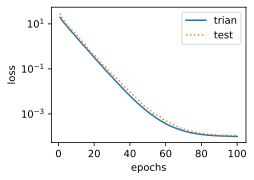

In [18]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:,:],
            labels[:n_train], labels[n_train:])